In [1]:
import time

from collections import Counter

from typing import List, Tuple

from src import generate_random_password, password_selection

In [2]:
import matplotlib.pyplot as plt

### Задание

1. Разработать программу, реализующую следующие функции:
- генерация строки с заданной пользователем длиной, состоящей из символов строчного русского алфавита;
- поверка равномерности распределения символов путем визуализации частотного распределения;
- вычисление среднего времени подбора пароля, выбираемого из сгенерированной строки.
2. Построить график зависимости среднего времени подбора пароля от его длины.
3. Дать практические рекомендации по выбору пароля исходя из предположений об алфавите пароля; ценности информации, доступ к которой защищается с помощью этого пароля; производительности вычислительного средства атакующего и времени атаки.

### Проверка равномерности распределения символов путем визуализации частотного распределения

In [3]:
def visualize_frequency_distribution(password: str):
    counter = Counter(password)
    symbols = counter.keys()
    frequencies = counter.values()

    plt.bar(symbols, frequencies)

    plt.title(f"Частотное распределение символов пароля длинной {len(password)}")
    plt.xlabel("Символы")
    plt.ylabel("Частота")

    plt.xticks(rotation=90)

    plt.show()

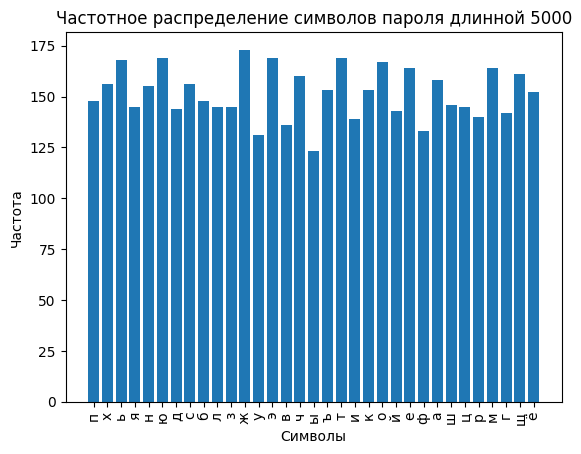

In [4]:
password = generate_random_password(5000)
visualize_frequency_distribution(password)

### График зависимости времени подбора пароля от его длины

In [5]:
def visualize_selection_length_time(entries: List[Tuple[int, int]]):
    password_lengths = [entry[0] for entry in entries]
    avg_time = [entry[1] for entry in entries]

    plt.plot(password_lengths, avg_time)

    plt.title(f"График зависимости среднего времени подбора пароля от его длины")
    plt.xlabel("Длина")
    plt.ylabel("Время")

    plt.show()

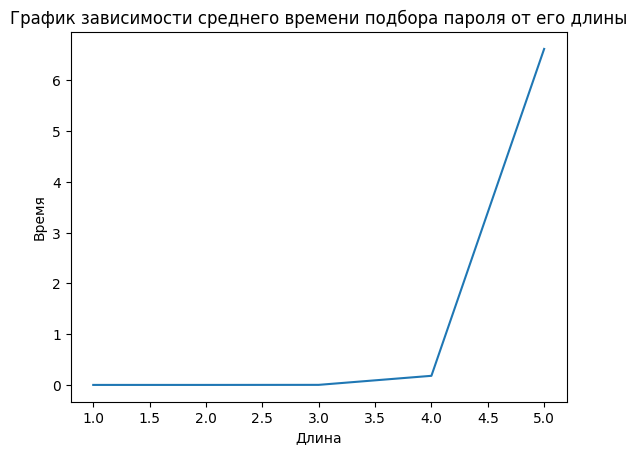

In [6]:
FROM, TO = 1, 5

entries: List[Tuple[int, int]] = []

for password_length in range(FROM, TO + 1):
    password = generate_random_password(password_length)
    start = time.time()
    password_selection(target_password=password)
    end = time.time()
    entries.append((password_length, end - start))

visualize_selection_length_time(entries)

График строится по значениям полученным в ходе нахождения пароля длинной от 1 до 5 символов. Как видно на графике, время нахождения увеличивается по мере увелечения длинны пароля

| Кол-во элем | 1 попытка    |  2 попытка   |   3 попытка  | 4 попытка    | Среднее время | Кол-во комбинаций |
| ----------- | ------------ | ------------ | ------------ | ------------ | ------------- | ----------------- |
| 1 элемент   |   2.19e-05c  |   0.000116c  |  2.47e-05c   |  2.00e-05c   |  2.00e-05c    |    33             |
| 2 элемент   |   0.000492c  |   0.000179c  |  0.000238c   |  0.000359c   |  0.000359c    |    528            |
| 3 элемент   |   0.014934c  |   0.001638c  |  0.004027c   |  0.011257c   |  0.011257c    |    5456           |
| 4 элемент   |   0.276643c  |   0.177871c  |  0.341122c   |  0.020184c   |  0.020184c    |    40920          |
| 5 элемент   |   9.619533c  |   9.505428c  |  7.904217c   |  9.710628c   |  9.710628c    |    237336         |

Занчения выше были проведены практическим путем, но дальнейшая проверка на паролях блльщей длины, требуется больщего времени ожидания. Поэтому для экономии варемени для значения для паролей длины от 6 до 10 мы проведем вручную

| Кол-во элем | Время подбора| Кол-во комбинаций |
| ----------- | ------------ | ------------------|
| 6 элемент   |   45.32c     |   1107568         |
| 7 элемент   |   174.79c    |   4272048         |
| 8 элемент   |   568.07c    |   13884156        |
| 9 элемент   |   1577.98c   |   38567100        |
| 10 элемент  |   3787.14c   |   92561040        |

### Вывод
Как видно по графику выше, время необходимое для подбора пароля, экспоненциально зависит от размера алфавита и длины пароля. Пароль которые состоит из одного символа будет подобран быстрее, чем пароль из 6 символов.

В качестве увелечения безопасности пароля, следует включать в доступные для создания пароля символы также символы верхнего регистра, специальные символы (@, $, % и тд.), цифры, а также символы английского алфавита (также в нижних и верхних регистрах). Потому что как видно на графике одних только прописных букв русского алфавита для грантированно безопасного пароля недостаточно